# 3. Розв'язування нелінійних рівнянь
------------

Нехай маємо рівняння

$(1)\qquad\qquad\qquad
f(x)=0, \quad x\in [a,b],$

де $f:[a,b]\to \mathbb{R}$ -- неперервна на $[a,b]$ функція.


### 3.1.4. Метод Ньютона
--------------
Нехай рівняння (1) 
має і тільки один розв'язок $x_*$ на відрізку $[a,b]$ і $f(a)\cdot f(b)<0$. 

Вважаємо, що $f\in C^{1} ([a,b])$, $f'(x)\ne 0$ для всіх $x\in [a,b]$.

Метод Ньютона визначається так:

* задаємо початкове значення $x_0\in [a,b]$ і

* знаходимо послідовні наближення $x_1, x_2, x_3, \ldots$ розв'язку рівняння (1) за формулою

$(2)\qquad\qquad\qquad x_{n+1} = x_n- \frac{f(x_n)}{f'(x_n)}, \quad n=0,1,2, \dots\,.$

 Для того, щоби цей метод був коректним, необхідне виконання умови:
$x_n\in [a,b]$ для кожного $n\in \mathbb{N}.$

**Теорема.** Нехай  $f(a)f(b)<0$, функції $f', f''$ неперервні і відмінні від нуля на $[a,b]$ або, що те саме,
 зберігають знак на $[a,b]$.
Тоді рівняння  (1) має і тільки один розв'язок $x_\ast$ та, якщо початкове
$x_0 \in [a,b]$ задовольняє умову

$(3)\qquad\qquad\qquad f(x_0)f''(x_0)>0,$

то послідовність $\{x_n\}$, отримана методом Ньютона, збігається до розв'язку $x_\ast$.

Крім того, для довільного $n\in \mathbb{N}$ маємо оцінку  відхилення $x_n$ від $x_\ast$:

$(4)\qquad\qquad\qquad 
|x_n-x_\ast|\leqslant \frac{M_2}{2m_1}|x_n-x_{n-1}|^2,$

де 

$(5)\qquad\qquad\qquad M_2:=\max\limits_{x\in [a,b]}|f''(x)|, \quad m_1:=\min\limits_{x\in [a,b]}|f'(x)|$.

#### Пояснення до використання програмного коду
-----------------
*   Підготувати середовище і потрібні функції : 
    1. виконати комірку для підготовки середовища
    2. виконати комірку, де **визначена** функція ``Newton_iteration`` 
    3. виконати комірку, де **визначена** функція ``plot_graphics``
    4. виконати комірку, де **визначені** функції ``f`` і ``f_deriv``
    
*   Локалізувати (графічно) розв'язок рівняння (1)
     1. виконати комірку, в якій задається відрізок ``[a, b]``
    2. виконати комірку, в якій будується графік; якщо ініціалізовано інтерактивний режим, то за допомогою масштабування графіку уточнити (звузити) відрізок ``[a, b]``, щоб на ньому знаходився лише один розв'язок рівняння, інакше - виконувати наступні пункти
    3. виконати комірку, в якій задається звужений відрізок ``[a, b]``
    4. виконати комірку, в якій будується графік на звуженому відрізку ``[a, b]``
    5. пункти 3 і 4 можна послідовно повторювати для точнішої локалізації потрібного розв'язку
    
*   Обчислити наближення локалізованого розв'язку
    1. задати точність ``eps`` чисельного розв'язку і початкове наближення ``x0``
    2. виконати комірку, де є **виклик** функції ``Newton_iteration``
    3. для знаходження іншого корення виконати дії пунктів локалізації

#### Програмна реалізація методу
------------

>#### Підготовка середовища

In [1]:
# при виконанні в JupyterLab наступний рядок розкоментувати
#%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

>#### ``Newton_iteration`` -- функція, яка реалізує метод Ньютона 

In [2]:
def Newton_iteration(f,f_deriv, a, b, x0, eps):
    """ знаходження методом Ньютона чисельного розв'язку рівняння (1), 
        де f -- непервна функція на відрізку [a, b],  
        f_deriv -- похідна функція на відрізку [a, b]
        x0 -- початкове наближення
        eps -- задана точність
    """   
    x_prev=x0
    k=1
    x_new = x_prev - f(x_prev)/f_deriv(x_prev)
    if np.abs(x_new-x_prev)<eps:
        return x_new,k
    while np.abs(x_new-x_prev) > eps:
        k+=1
        x_prev = x_new
        x_new = x_prev - f(x_prev)/f_deriv(x_prev)       
    return x_new,k

>#### ``plot_graphics`` -- функція для побудови графіка функції ``f`` на відрізку ``[a,b]`` за значеннями в ``n`` точках 

In [3]:
def plot_graphics(f, a, b, n):
    """фуункція для побудови графіка функції f 
       на відрізку [a,b] за значеннями в n точках 
    """
    xarr = np.linspace(a, b, n)    
    y=f(xarr) 
    fig = plt.figure()
    ax = fig.gca()
    ax.plot(xarr,y)
    ax.axhline(color="grey", ls="--", zorder=-1)
    ax.axvline(color="grey", ls="--", zorder=-1)
    ax.set_xlim(a,b)
    plt.show()

#### Обчислювальні експерименти
------------

Знаходження чисельних розв'язків методом Ньютона продемонструємо на прикладах.

**Приклад 1.** Нехай у рівнянні (1) $f(x)=sin(x^2-2x)$. Обчислити методом Ньютона другий додатній розв'язок цього рівняння з точністю $eps=10^{-5}$.

Легко переконатися, що першими додатніми розв'язками є $x_1=2.0$, а також $x_2 = 1+np.sqrt(1+np.pi)$ і $x_3 = 1+np.sqrt(1+2*np.pi)$. Виконуючи обчислення, отримаємо $x_2 = 3.035090330572526$ і $x_3 = 3.698737724785346$ з точністю $10^{-15}$. Далі називатимемо їх аналітичними розв'язками і збережемо їх значення для подальшого аналізу похибок чисельних розв'язків:

In [50]:
x_1 = 2.0 
x_2 = 3.035090330572526 
x_3 = 3.698737724785346

>#### ``f`` і ``f_deriv`` -- функція лівої частини рівняння (1) та її похідна

In [5]:
def f(x):
    """функція лівої частини рівняння (1)"""
    return np.sin(x*x-2*x)

def f_deriv(x):
    """похідна функції лівої частини рівняння (1)"""
    return (2*x - 2)*np.cos(x*x-2*x)

In [6]:
# задання відрізка
a=0
b=10

>#### Побудова графіку функції ``f``

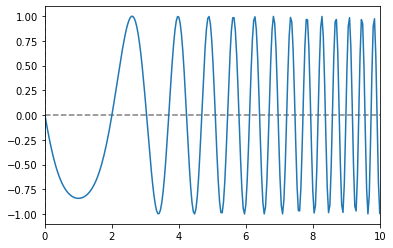

In [7]:
plot_graphics(f, a, b, 256)

>#### Уточнення проміжку ``[a, b]``

In [8]:
# задання відрізка
a=2.8
b=3.2

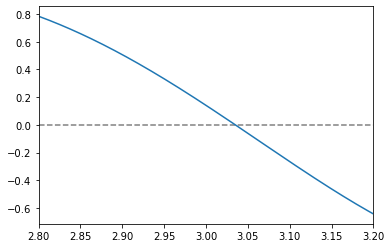

In [9]:
plot_graphics(f, a, b, 256)

Виконуючи наступні комірки, можна переконатися, що навіть при достатньо грубому початковому наближенні абсолютна та відноста похибки чисельного розв'язку швидко заникають при збільшенні кількості ітерацій:

In [25]:
#знаходження чисельного розв'язку
eps=0.001
x0=3.0
x, k = Newton_iteration(f, f_deriv, a, b,x0, eps)
print(f"Розв'язок рівняння x={x} з точністю eps={eps} за k={k} ітерацій")

Розв'язок рівняння x=3.0350904029782013 з точністю eps=0.001 за k=2 ітерацій


In [26]:
print(f"Відносна похибка чисельного розв'язку delta={np.abs(x_2-x)/x_2}")

Відносна похибка чисельного розв'язку delta=2.3856184609700732e-08


In [27]:
#знаходження чисельного розв'язку
eps=0.00001
x0=3.0
x, k = Newton_iteration(f, f_deriv, a, b,x0, eps)
print(f"Розв'язок рівняння x={x} з точністю eps={eps} за k={k} ітерацій")

Розв'язок рівняння x=3.0350903305725274 з точністю eps=1e-05 за k=3 ітерацій


In [28]:
print(f"Відносна похибка чисельного розв'язку delta={np.abs(x_2-x)/x_2}")

Відносна похибка чисельного розв'язку delta=4.389548528853422e-16


In [30]:
#знаходження чисельного розв'язку
eps = 0.00000000001
x0 = 3.0
x, k = Newton_iteration(f, f_deriv, a, b,x0, eps)
print(f"Розв'язок рівняння x={x} з точністю eps={eps} за k={k} ітерацій")

Розв'язок рівняння x=3.035090330572526 з точністю eps=1e-11 за k=4 ітерацій


Як бачимо, вже за чотири ітерації абсолютна похибка чисельного розв'язку не перевищує $10^{-15}$.

Виконання наступних комірок демонструє, що при точнішому початковому наближенні чисельний розв'язок співпадатиме з аналітичним уже на другій ітерації:

In [31]:
#знаходження чисельного розв'язку
eps=0.00001
x0=3.035
x, k = Newton_iteration(f, f_deriv, a, b,x0, eps)
print(f"Розв'язок рівняння x={x} з точністю eps={eps} за k={k} ітерацій")

Розв'язок рівняння x=3.035090330572526 з точністю eps=1e-05 за k=2 ітерацій


In [32]:
#знаходження чисельного розв'язку
eps=0.00000000001
x0=3.035
x, k = Newton_iteration(f, f_deriv, a, b,x0, eps)
print(f"Розв'язок рівняння x={x} з точністю eps={eps} за k={k} ітерацій")

Розв'язок рівняння x=3.035090330572526 з точністю eps=1e-11 за k=3 ітерацій


In [33]:
#знаходження чисельного розв'язку
eps=0.0000000000001
x0=3.035
x, k = Newton_iteration(f, f_deriv, a, b,x0, eps)
print(f"Розв'язок рівняння x={x} з точністю eps={eps} за k={k} ітерацій")

Розв'язок рівняння x=3.035090330572526 з точністю eps=1e-13 за k=3 ітерацій


Разом з тим, через грубе задання початкового наближення чисельний розв'язок за методом Ньютона може співпасти з іншими аналітичними розв'язками, наприклад, при заданих у наступних комірках наближеннях матимемо співпадіння з $x_1$ та $x_3$: 

In [51]:
#знаходження чисельного розв'язку
eps=0.0000001
x0=2.5
x, k = Newton_iteration(f, f_deriv, a, b,x0, eps)
print(f"Розв'язок рівняння x={x} з точністю eps={eps} за k={k} ітерацій")

Розв'язок рівняння x=2.0 з точністю eps=1e-07 за k=8 ітерацій


In [52]:
#знаходження чисельного розв'язку
eps=0.0000001
x0=2.7
x, k = Newton_iteration(f, f_deriv, a, b,x0, eps)
print(f"Розв'язок рівняння x={x} з точністю eps={eps} за k={k} ітерацій")

Розв'язок рівняння x=3.698737724785346 з точністю eps=1e-07 за k=5 ітерацій


**Приклад 2.** Нехай у рівнянні (1) $f(x)=cos(x^2-2x)$. Обчислити методом Ньютона другий додатній розв'язок цього рівняння з точністю $eps=10^{-5}$.

Легко переконатися, що $x_2 = 1+np.sqrt(1+3*np.pi/2) = 3.390060455382811$ і $x_3 = 1+np.sqrt(1+5*np.pi/2) = 3.975564086685831$ з точністю $10^{-15}$. Збережемо ці значення:

In [74]:
x_2 = 1+np.sqrt(1+3*np.pi/2)
x_3 = 1+np.sqrt(1+5*np.pi/2)

>#### ``fcs`` -- функція лівої частини рівняння (1) 

In [53]:
def fcs(x):
    """функція лівої частини рівняння (1)"""
    return np.cos(x*x-2*x)

def fcs_deriv(x):
    """похідна функції лівої частини рівняння (1)"""
    return -(2*x - 2)*np.sin(x*x-2*x)

>#### Легко переконатися в аналогічний до попереднього прикладу спосіб, що шуканий розв'язок заданого рівняння знаходиться на відрізку ``[3.389, 3.390]``. 

Послідовне виконання наступних комірок даватиме чисельний розв'язок рівняння (1) при відповідних значеннях параметра ``eps``:   

In [54]:
# задання відрізка
a=3.389
b=3.390

In [61]:
#знаходження чисельного розв'язку
eps=0.001
x0=3.38
x, k = Newton_iteration(fcs, fcs_deriv, a, b,x0, eps)
print(f"Розв'язок рівняння x={x} з точністю eps={eps} за k={k} ітерацій")

Розв'язок рівняння x=3.3900604555586753 з точністю eps=0.001 за k=2 ітерацій


In [62]:
print(f"Відносна похибка чисельного розв'язку delta={np.abs(x_2-x)/x_2}")

Відносна похибка чисельного розв'язку delta=5.1876423561323855e-11


In [56]:
#знаходження чисельного розв'язку
eps=0.00001
x0=3.38
x, k = Newton_iteration(fcs, fcs_deriv, a, b,x0, eps)
print(f"Розв'язок рівняння x={x} з точністю eps={eps} за k={k} ітерацій")

Розв'язок рівняння x=3.390060455382811 з точністю eps=1e-05 за k=3 ітерацій


In [63]:
#знаходження чисельного розв'язку
eps = 0.000001
x0 = 3.38
x, k = Newton_iteration(fcs, fcs_deriv, a, b,x0, eps)
print(f"Розв'язок рівняння x={x} з точністю eps={eps} за k={k} ітерацій")

Розв'язок рівняння x=3.390060455382811 з точністю eps=1e-06 за k=3 ітерацій


Як бачимо, при заданому початковому наближенні вже за три ітерації чисельний розв'язок співпалдає з аналітичним. Зазначимо, грубше початкове наближення вимагає більшу кількість ітерацій, або ж можемо отримати наближення іншого розв'язку: 

In [67]:
#знаходження чисельного розв'язку
eps = 0.00000001
x0 = 3.2
x, k = Newton_iteration(fcs, fcs_deriv, a, b,x0, eps)
print(f"Розв'язок рівняння x={x} з точністю eps={eps} за k={k} ітерацій")

Розв'язок рівняння x=3.3900604553828106 з точністю eps=1e-08 за k=5 ітерацій


In [72]:
#знаходження чисельного розв'язку
eps = 0.00000001
x0 = 3.1
x, k = Newton_iteration(fcs, fcs_deriv, a, b,x0, eps)
print(f"Розв'язок рівняння x={x} з точністю eps={eps} за k={k} ітерацій")

Розв'язок рівняння x=3.975564086685831 з точністю eps=1e-08 за k=4 ітерацій


In [14]:
plt.close('all')